<a href="https://colab.research.google.com/github/matteeussPei/Analise-Airbnb-London/blob/main/Airbnb_Data_Analysis_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis
---
The [Airbnb](https://www.airbnb.com.br/) is already considered to be the **biggest hotel company today**. Oh, and it doesn't own any hotels!

Connecting people who want to travel (and stay) with hosts who want to rent out their properties in a practical way, Airbnb provides an innovative platform to make this accommodation alternative.

By the end of 2018, the startup founded 10 years ago had already hosted more than 300 million people around the world, challenging traditional hotel chains.

It's possible to acquire and analyze data from Airbnb, made available by them at Inside Airbnb. It's a great source of data to be used in Data Science projects.
> **In this notebook, we'll analyze the data on London, and see what insights we can get from it.**
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

---



#London

> London is the capital and largest city of England and the United Kingdom, the City of London, its ancient core and financial centre, was founded by the Romans as Londinium and retains its medieval boundaries. The City of Westminster, to the west of the City of London, has for centuries hosted the national government and parliament.
Since the 19th century, the name "London" also refers to the metropolis around this core.
As one of the world's major global cities, London exerts a strong influence on world art, entertainment, fashion, commerce and finance, education, health care, media, science and technology, tourism, transport, and communications.
<center><img alt="Analisando Airbnb" width="90%" src="https://upload.wikimedia.org/wikipedia/commons/9/97/Palace_of_Westminster%2C_London_-_Feb_2007.jpg"></center>

## Obtaining the Data


In [ ]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

!pip install pywaffle
from pywaffle import Waffle



In [ ]:
# importing the data into a DataFrame
file = 'http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/listings.csv'
df = pd.read_csv(file)


---
## Analyzing the Data


> The objective of this step is to understand the structure of the dataset

**Variable Dictionary**

* id - Listing identification number\
* name - Listing name\
* host_id - Host identification number
* host_name - Host name\
* neighbourhood_group - Borough name\
* neighbourhood - Neighborhood name\
* latitude - Latitude of the listing\
* longitude - Longitude of the listing\
* room_type - Room type\
* price - Price in dollars\
* minimum_nights - Minimum number of nights to book the listing\
* number_of_reviews - Number of reviews the listing received\
* last_review - Date of the last review\
* reviews_per_month - Number of reviews per month\
* calculated_host_listings_count - Number of listings by the host\
* availability_365 - Number of available days in a 365 days period\

Before analyzing anything, let's see the "face"of our dataset, analyzing the first 5 entries.

In [ ]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN


### **Q1. How many attributes (variables) and entries are there in our dataset? What are the types of the variables?**

In [ ]:
# identifying the volume of the data in the DataFrame
print('Entries: \t {}' .format(df.shape[0]))
print('Variables: \t {}\n'.format(df.shape[1]))

# identifying the types of the variables
display(df.dtypes)

Entries: 	 87947
Variables: 	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. What's the percentage of missing values in the dataset?**

> The quality of a dataset is directly related to the number of missing values. It is important to understand right from the start whether these null values are significant compared to the total number of entries.

* You can see that the [neighborhood_group] column has 100% of its values missing.
* The [license] variable has approximately 100% of its rows with null values.
* The [reviews_per_month] and [last_review] variables have approximately 25% of null values.

In [ ]:
# sort variables by missing values
df.isnull().sum().sort_values(ascending = False)/df.shape[0]

neighbourhood_group               1.000000
license                           0.999989
reviews_per_month                 0.251947
last_review                       0.251947
host_name                         0.000068
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [ ]:
# checking the actual number of missing values
(df.isnull().sum()).sort_values(ascending = False)

neighbourhood_group               87947
license                           87946
reviews_per_month                 22158
last_review                       22158
host_name                             6
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
name                                  0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
price                                 0
dtype: int64

### **Q3. What is the statistical distribution of the data?**

> To help us understand the distribution of the data, let's plot histograms:




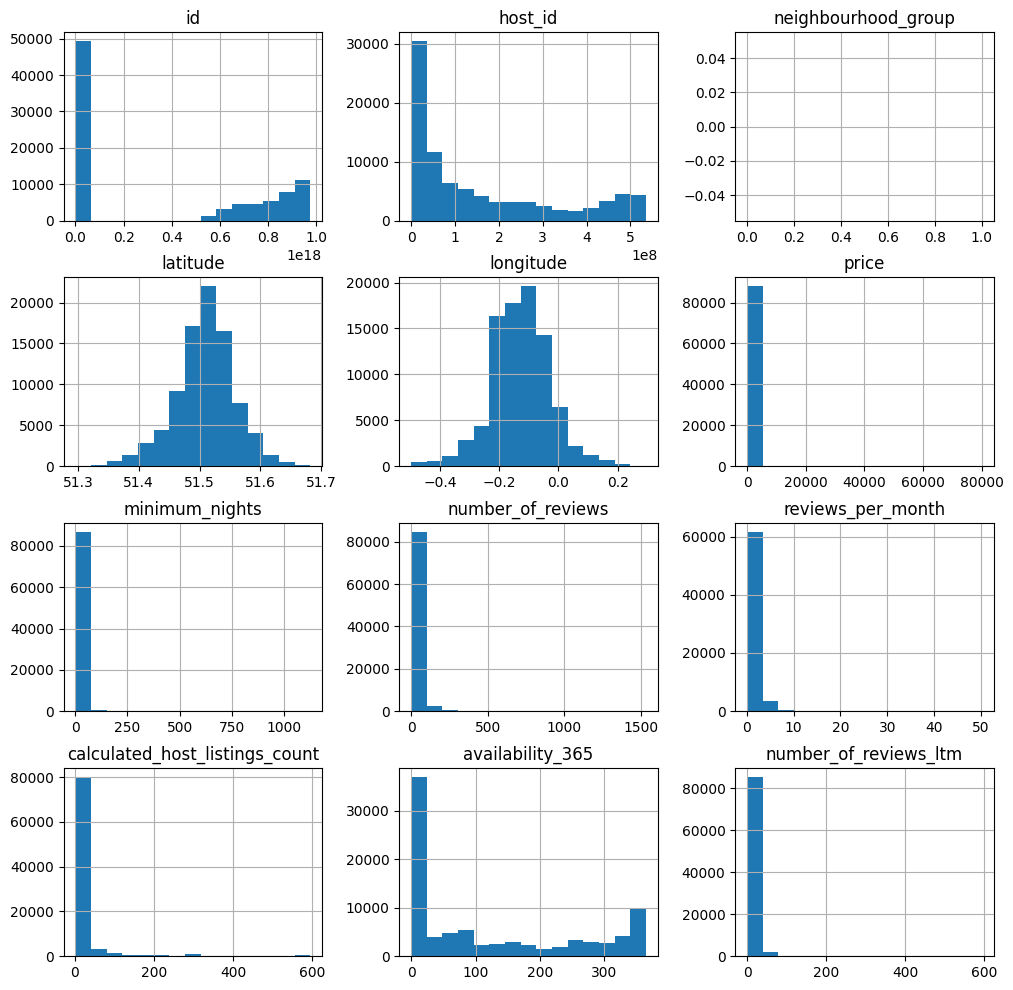

In [ ]:
df.hist(bins = 15, figsize = (12,12));

### **Q4. Looking for outliers.**

> From the distribution of the histogram, you can see evidence of outliers. Take for example the variables [price], [minimum_nights].\
The values do not follow a distribution, and distort the entire graphical representation. To confirm this, there are two quick ways to help detect *outliers*. These are:
* Statistical summary using the `describe()` method
* Plotting `boxplots` for the variable.

In [ ]:
# Statistical summary of the variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,87947.00,87947.00,87947.00,65789.00,87947.00,87947.00
mean,181.35,5.62,17.98,1.01,18.14,121.12
std,486.17,23.57,42.83,1.37,63.74,134.56
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,63.00,1.00,0.00,0.15,1.00,0.00
50%,110.00,2.00,4.00,0.54,2.00,65.00
75%,193.00,4.00,16.00,1.32,6.00,249.00
max,80100.00,1125.00,1536.00,50.25,595.00,365.00


Looking at the summary statistics above, we can confirm some hypotheses:

* The [price] variable has 75% of its value below 193, however its maximum value is 80100.

* 75% of the [minium_nights] data is below 4 nights, but the maximum value is 1125.

* The variable [minimum_nights] at its max is way over the real limit (365 days)


#### **Making boxplots**

> Price Variable

In [ ]:
# identifying the outliers for price variable
var = "Price"
q1 = df.price.quantile(.25)
q3 = df.price.quantile(.75)
IQR = q3 - q1
print(f'IQR from {var} variable:', IQR)

# defining limits
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

print(f'Upper limit from {var}:', sup)
print(f'Lower limit from {var}:', inf)


IQR from Price variable: 130.0
Upper limit from Price: 388.0
Lower limit from Price: -132.0


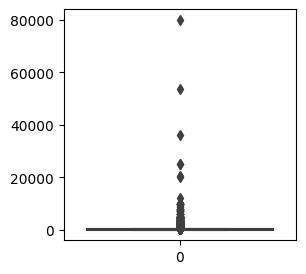

Price: entries over 388.0:
6481 entries
7.37%


In [ ]:
figure = plt.figure(figsize=(3,3))
sns.boxplot(df.price)
plt.show()

# the number of values above the upper limit
print(f"{var}: entries over {sup}:")
print("{} entries".format(len(df[df.price > sup])))
print("{:.2f}%".format((len(df[df.price > sup]) / df.shape[0])*100))

> Minimum_nigth Variable

In [ ]:
# identifying the outliers for minimun_night variable
var = "Minimum night"
q1 = df.minimum_nights.quantile(.25)
q3 = df.minimum_nights.quantile(.75)
IQR = q3 - q1
print(f'IQR from {var} variable:', IQR)

# defining limits
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

print(f'Upper limit from {var}:', sup)
print(f'Lower limit from {var}:', inf)

IQR from Minimum night variable: 3.0
Upper limit from Minimum night: 8.5
Lower limit from Minimum night: -3.5


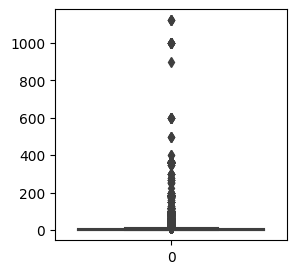

Minimum night: entries over 8.5:
6945 entries
7.90%


In [ ]:
figure = plt.figure(figsize=(3,3))
sns.boxplot(df['minimum_nights']);
plt.show()

# the number of values above the upper limit
print(f"{var}: entries over {sup}:")
print("{} entries".format(len(df[df.minimum_nights > sup])))
print("{:.2f}%".format((len(df[df.minimum_nights > sup]) / df.shape[0])*100))

> Number_of_reviews Variable

In [ ]:
# identifying the outliers for number_of_reviews variable
var = 'Number of reviews'
q1 = df["number_of_reviews"].quantile(.25)
q3 = df["number_of_reviews"].quantile(.75)
IQR = q3 - q1
print(f'IQR from {var} variable:', IQR)

# defining limits
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

print(f'Upper limit from {var}:', sup)
print(f'Lower limit from {var}:', inf)

IQR from Number of reviews variable: 16.0
Upper limit from Number of reviews: 40.0
Lower limit from Number of reviews: -24.0


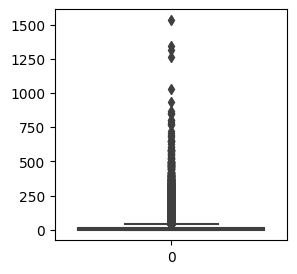

Number of reviews: entries over 40.0:
10178 entries
11.57%


In [ ]:
figure = plt.figure(figsize=(3,3))
sns.boxplot(df['number_of_reviews']);
plt.show()

# the number of values above the upper limit
print(f"{var}: entries over 40.0:")
print("{} entries".format(len(df[df.number_of_reviews > 40.0])))
print("{:.2f}%".format((len(df[df.number_of_reviews > 40.0]) / df.shape[0])*100))

> Reviews_per_month Variable

In [ ]:
# identifying the outliers for reviews_per_month variable
var = 'Reviews per month'
q1 = df["reviews_per_month"].quantile(.25)
q3 = df["reviews_per_month"].quantile(.75)
IQR = q3 - q1
print(f'IQR from {var} variable:', round(IQR,2))

# defining limits
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

print(f'Upper limit from {var}:', round(sup,2))
print(f'Lower limit from {var}:', round(inf,2))

IQR from Reviews per month variable: 1.17
Upper limit from Reviews per month: 3.08
Lower limit from Reviews per month: -1.61


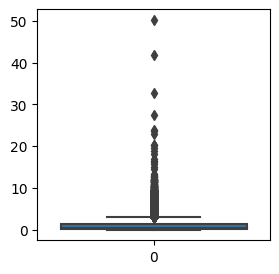

Reviews per month: entries over 3.08:
4814 entries
5.47%


In [ ]:
figure = plt.figure(figsize=(3,3))
sns.boxplot(df['reviews_per_month']);
plt.show()

# the number of values above the upper limit
print(f"{var}: entries over {round(sup,2)}:")
print("{} entries".format(len(df[df.reviews_per_month > sup])))
print("{:.2f}%".format((len(df[df.reviews_per_month > sup]) / df.shape[0])*100))

> Calculated_host_listings_count Variable

In [ ]:
# identifying the outliers for calculated_host_listing_count variable
var = 'Calculated host listing count'
q1 = df['calculated_host_listings_count'].quantile(.25)
q3 = df['calculated_host_listings_count'].quantile(.75)
IQR = q3 - q1
print(f'IQR from {var} variable:', round(IQR,2))

# defining limits
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

print(f'Upper limit from {var}:', round(sup,2))
print(f'Lower limit from {var}:', round(inf,2))

IQR from Calculated host listing count variable: 5.0
Upper limit from Calculated host listing count: 13.5
Lower limit from Calculated host listing count: -6.5


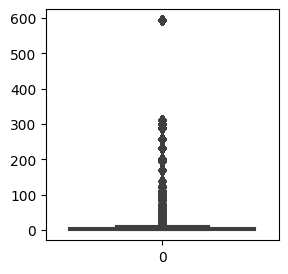

Calculated host listing count: entries over 13.5:
14657 entries
16.67%


In [ ]:
figure = plt.figure(figsize=(3,3))
sns.boxplot(df['calculated_host_listings_count']);
plt.show()

# the number of values above the upper limit
print(f"{var}: entries over {round(sup,2)}:")
print("{} entries".format(len(df[df.calculated_host_listings_count > sup])))
print("{:.2f}%".format((len(df[df.calculated_host_listings_count > sup]) / df.shape[0])*100))

**Cleaning the outliers**
> Now that we have identified the outliers in our variables, let's clean the DataFrame and plot histograms again.

In [ ]:
# removing the outliers from the DataFrame, creating a new DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 388.00].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 8.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 3.08].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 13.5].index, axis=0, inplace=True)


#removing columns totaly empty
df_clean.drop(columns = "neighbourhood_group", inplace = True)
df_clean.drop(columns = "license", inplace = True)

#removing useless columns
df_clean.drop(columns = ['id', 'name', 'host_id', 'host_name', 'last_review'], inplace = True)

#converting the price variable
df_clean['price'] = df_clean['price'].astype('float64')

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ', df_clean.shape)

Shape antes da limpeza:  (87947, 18)
Shape após a limpeza:  (54453, 11)


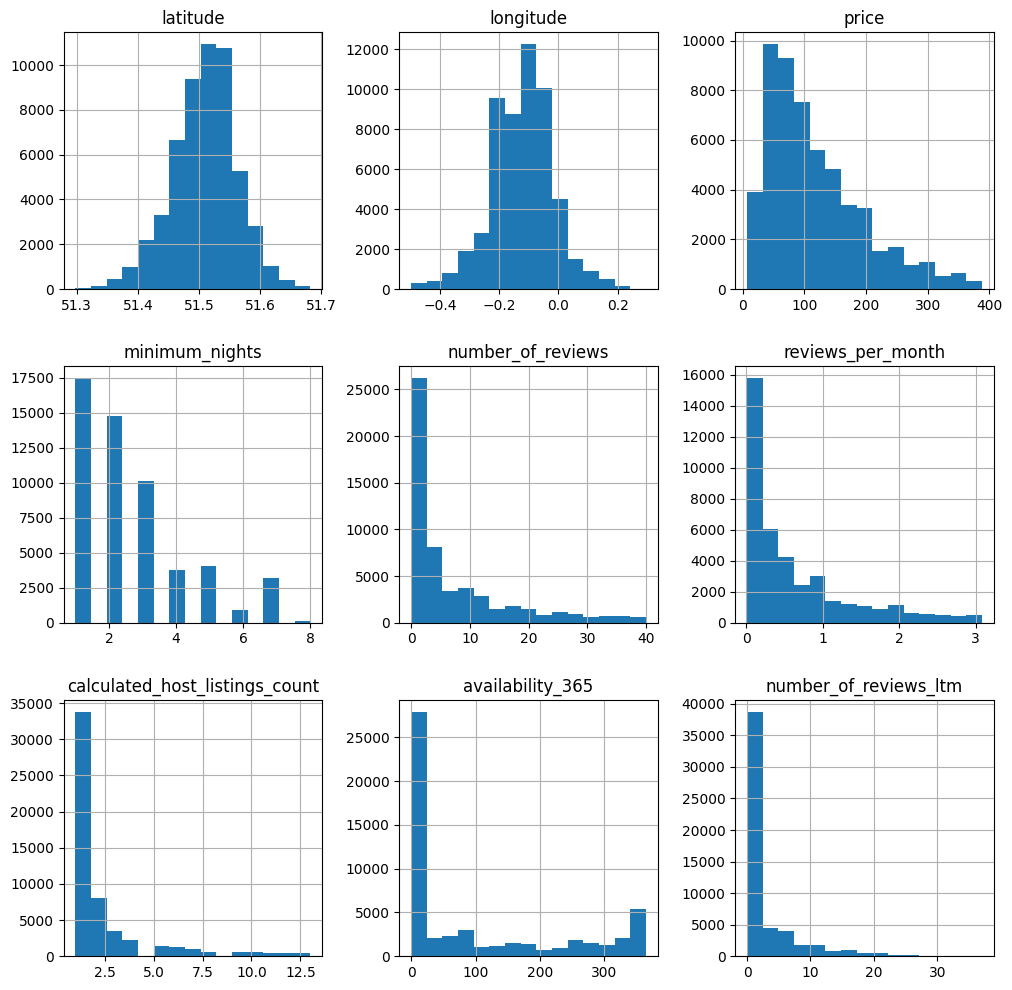

In [ ]:
# plotting histograms for numerical values
df_clean.hist(bins = 15, figsize = (12,12));

### **Q5. Correlation between the variables**

> Correlation means there is a relationship between two things. For us, that means there is a relationship or similarity between two variables.\
This relationship can be measured, and the coefficient of correlation will ascertain its intensity. To identify the correlations between the variables we're interested in, let's:
* Create a Correlation Matrix
* Create a heatmap from the matrix, using the seaborn library


In [ ]:
# creating a correlation matrix
corr = df_clean.corr()

# showing the correlation matrix
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.090731,-0.014427,0.014818,-0.012818,-0.006112,0.030582,-0.008107,-0.005119
longitude,0.090731,1.000000,-0.091887,-0.025329,-0.008641,-0.013735,-0.041573,-0.000112,-0.003594
price,-0.014427,-0.091887,1.000000,0.141096,0.034136,0.181385,0.155325,0.216806,0.120483
minimum_nights,0.014818,-0.025329,0.141096,1.000000,0.009318,-0.135345,-0.052497,-0.072550,-0.044617
number_of_reviews,-0.012818,-0.008641,0.034136,0.009318,1.000000,0.258249,0.041971,0.030241,0.612609
reviews_per_month,-0.006112,-0.013735,0.181385,-0.135345,0.258249,1.000000,0.176318,0.301100,0.673893
calculated_host_listings_count,0.030582,-0.041573,0.155325,-0.052497,0.041971,0.176318,1.000000,0.250311,0.119072
availability_365,-0.008107,-0.000112,0.216806,-0.072550,0.030241,0.301100,0.250311,1.000000,0.207201
number_of_reviews_ltm,-0.005119,-0.003594,0.120483,-0.044617,0.612609,0.673893,0.119072,0.207201,1.000000


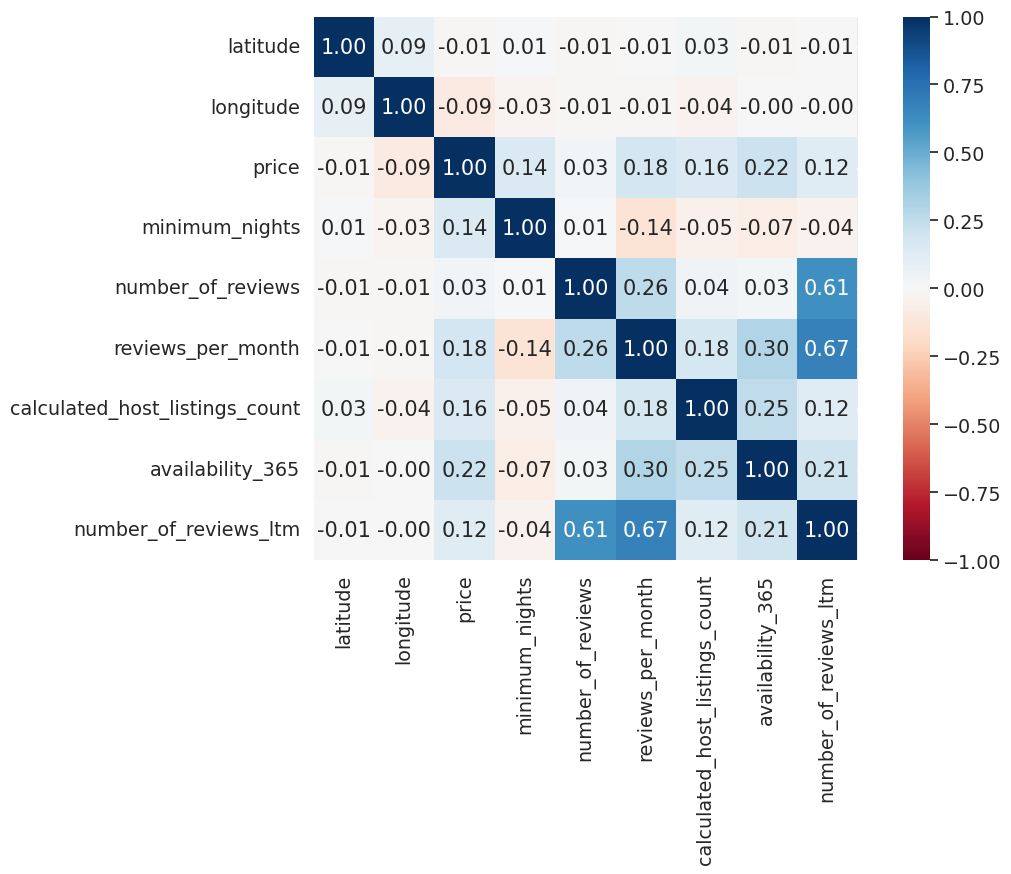

In [ ]:
# plotting a heatmap for the correlations
figure = plt.figure(figsize=(12,9))
sns.set(font_scale = 1.25)
sns.heatmap(corr, annot=True,vmin = -1, vmax = 1, cmap = 'RdBu', linecolor= 'white', fmt = '.2f', square = True)
plt.tight_layout();

In the way it is not possible to see clearly if there are strong correlations between the variables, later we can have more detail.

### **Q6. What is the average price for rent?**
> How much do you have to spend on average to spend a night in London?

In [ ]:
# checking the average price of the listings
print('Average price:',  df_clean.price.mean())



Average price: 117.28694470460765


### **Q7. What kind of listing is most rented on Airbnb?**

> The [room_type] column indicates the type of rental being advertised on Airbnb. If you've ever rented on the site, you'll know that there are options for entire apartments/houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each type of rental, using the value_counts() method.

In [ ]:
# amount of each type of property available
df_clean['room_type'].value_counts()

Entire home/apt    31547
Private room       22522
Shared room          319
Hotel room            65
Name: room_type, dtype: int64

In [ ]:
#percentage of each type of property available
(df_clean['room_type'].value_counts()/df.shape[0])*100

Entire home/apt    35.870467
Private room       25.608605
Shared room         0.362718
Hotel room          0.073908
Name: room_type, dtype: float64

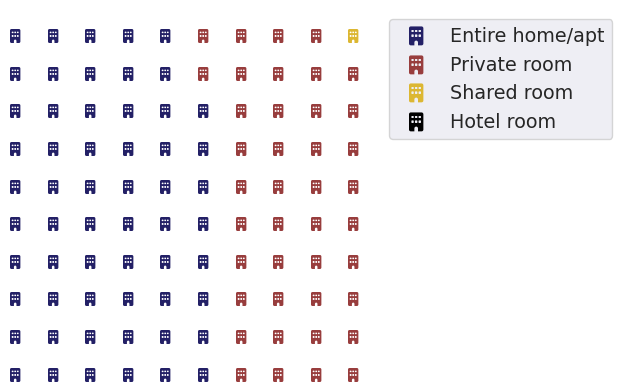

In [ ]:
# gráfico waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=10,
                colors=("#232066", "#983D3D", "#DCB732", "#000000"),
                values=df_clean["room_type"].value_counts().to_dict(), icons='building', icon_size=10,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();


### **Q8. What's the most expensive location of the dataset?**

> It's possible to check a variable in relation to another using the function groupby(). In this case, we're going to compare the neighborhood in relation to their price.



In [ ]:
# see the average price for each neighborhood
df_clean.groupby('neighbourhood')['price'].mean().round(2)[:10].sort_values(ascending = False)


neighbourhood
City of London          166.31
Camden                  140.51
Brent                   111.81
Barnet                  107.90
Ealing                  104.36
Bromley                  97.47
Barking and Dagenham     93.85
Enfield                  92.48
Croydon                  85.16
Bexley                   81.39
Name: price, dtype: float64

So we confirmed our expectations and found that the City of London is the most expensive neighborhood.
Ainda há outros recursos visuais para ajudar a visualizar:

### **Looking at the Map**

> Now that we understand our dataset a little better, let's see how it looks like on the map. To do that, we'll use Folium library, to plot an interactive map.
However, our dataset is too big to be processed correctly and in a timely manner, so we're going to work with a very small percerntage of it, to make it possible for Folium to render it.

In [ ]:
import folium

In [ ]:
df_map = df.sample(frac=0.01, random_state=0)


In [ ]:
# creating necessary variables
locations = df_map[["latitude", "longitude", "neighbourhood"]]


In [ ]:
map = folium.Map(location=[locations.latitude.mean(), locations.longitude.mean()], zoom_start=14, control_scale=True)
for index, location_info in locations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["neighbourhood"]).add_to(map)

map

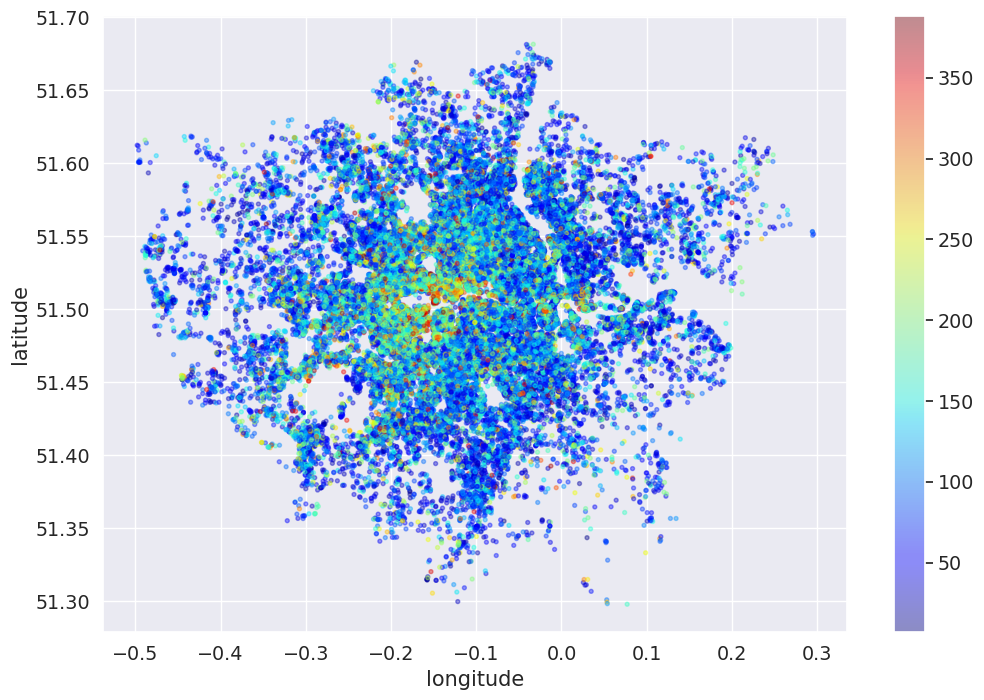

In [ ]:
df_clean.plot(kind="scatter", x= 'longitude', y= 'latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q9. What's the average number of minimum nights to rent an Airbnb in London?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

2.6017666611573285

### **Q10. Is there correlation between the type of room and the minimum number of nights in London?**
> To check that, let's see if there's any correlation between the type of the room and the minimum number of nights for each type.\
Since the variable [room_type] is categorical and [minimum_nights] is numerical, to correlate both we need to transform [room_type] into a numerical type of variable.\
To do so, we'll need dummy variables

In [ ]:
df_clean_dummies = pd.get_dummies(df_clean, columns = ['room_type', ])

In [ ]:
corr = df_clean_dummies.corr()

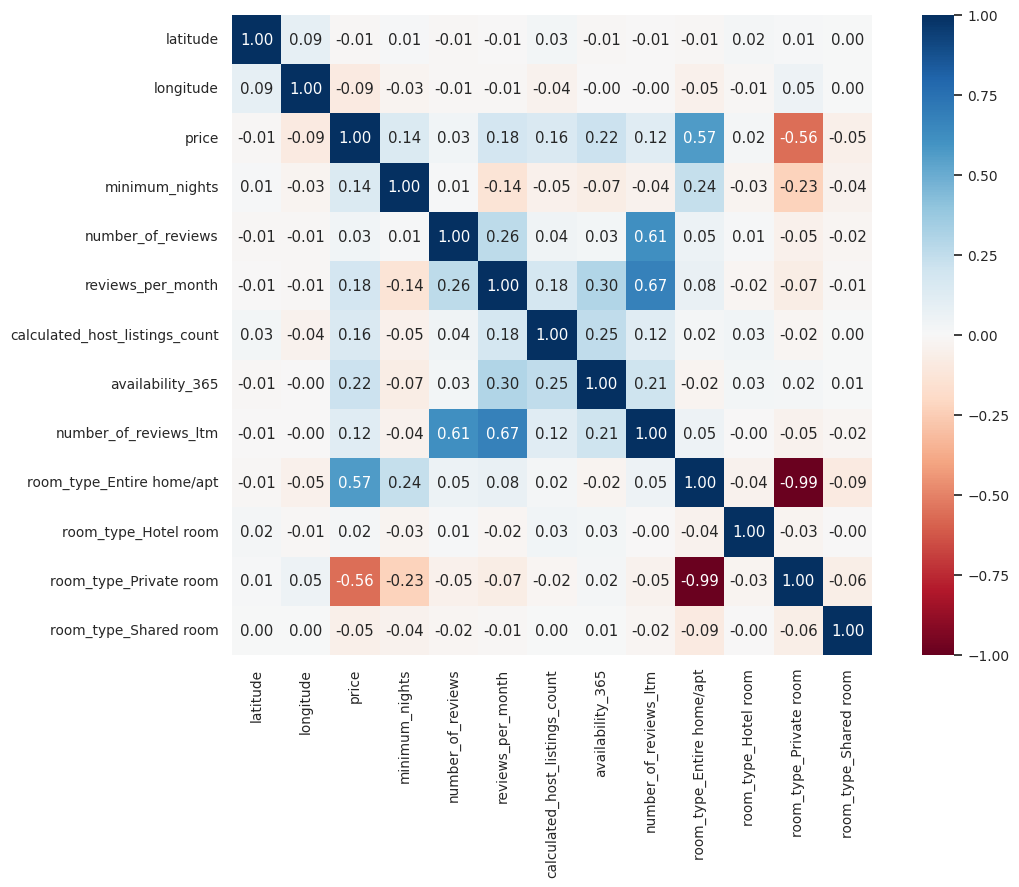

In [ ]:
# plotting a heatmap for the correlations
figure = plt.figure(figsize=(12,9))
sns.set(font_scale = 0.9)
sns.heatmap(corr, annot=True,vmin = -1, vmax = 1, cmap = 'RdBu', linecolor= 'white', fmt = '.2f', square = True)
plt.tight_layout();

### **Data Analysis Conclusions**
* City of London is the most expensive neighborhood.
* The further you go into the city center, the more expensive it gets.
* The average minimum number of nights that you need to stay to get the London City listing is 2.6 nights.
* Entire house/apartment in London City, this is still the most common listing for the city.
* The average price for an Airbnb in London City is US$ 117.28 per night.
* An entire house/apartment in the City of London increases in price, while private rooms decrease in price.
* An entire house/apartment in the City of London increases in minimum nights, while private rooms decrease in minimum_nights.

